In [57]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 1000)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils import createXYPlot
from datetime import datetime

today = str(datetime.now().date())
print(today)
plots_folder = f"./plots/{today}/iss"
os.system(f"mkdir -p {plots_folder}")

2022-01-09


0

### Iss data

In [38]:
df_ti = pd.read_csv("./data/rapporti_ISS - TI.csv")
df_decessi = pd.read_csv("./data/rapporti_ISS - Decessi.csv")
df_ricoveri = pd.read_csv("./data/rapporti_ISS - Ricoveri.csv")
df_contagi = pd.read_csv("./data/rapporti_ISS - Contagi.csv")
df_pop = pd.read_csv("./data/rapporti_ISS - Popolazione.csv")

In [39]:
df_dict = {
    "contagi": df_contagi,
    "ricoveri": df_ricoveri,
    "terapie_intensive": df_ti, 
    "decessi": df_decessi
}

In [40]:
for d in df_dict.items():
    d[1]["split"] = d[0]

In [41]:
df_iss = pd.concat(df_dict.values()).reset_index(drop=True)
df_iss["tot"] = df_iss["vax"] + df_iss["no_vax"]
df_iss["data"] = pd.to_datetime(df_iss["data"]).dt.date

In [42]:
#df_iss["data"] = pd.to_datetime(df_iss["data"]).dt.date
#var_dict = {
#    "terapie_intensive": "ingressi_terapia_intensiva",
#    "diagnosi": "nuovi_positivi",
#    "decessi": "variazione_deceduti"
#           }

#for key in var_dict.keys():
#    df_daily[var_dict[key]+"_last_month"] = df_daily.apply(lambda x: 
#                                                 df_daily.loc[(df_daily.data > x.data_prev_month) & 
#                                                              (df_daily.data <= x.data), var_dict[key]].sum(), axis=1)
#
#    df_final = df_daily.merge(df_iss, on=["data"], how="inner")
#    #display(df_final[df_final.split==key][["data", "tot", var_dict[key] + "_last_month"]])

In [43]:
age_values = df_iss["fascia_eta"].unique()
splits = df_iss["split"].unique()

In [44]:
from datetime import timedelta
df_pop["data_lag2"] = df_pop["data"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d") - timedelta(14))

In [51]:
#def plot_vax_vs_no_vax(age: str, 
#                       split: str):
#    plt.figure(dpi=100, figsize=(10,5))
#    df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)].reset_index()
#    title = f"{split}"
#    if age != "totale":
#        title += f" {age}"
#    createXYPlot(df_plt,
#                 y=["no_vax_frac"],
#                 labels=["frazione non vaccinati"],
#                 colors=["r"],
#                 x="data",
#                 plots_folder="./plots",
#                 days_interval=1,
#                 linewidth=1.8,
#                 title=title.replace("_"," ")
#                )

In [52]:
#plot_vax_vs_no_vax("80+", "terapie_intensive")

/Users/acastelli/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/acastelli/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/acastelli/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


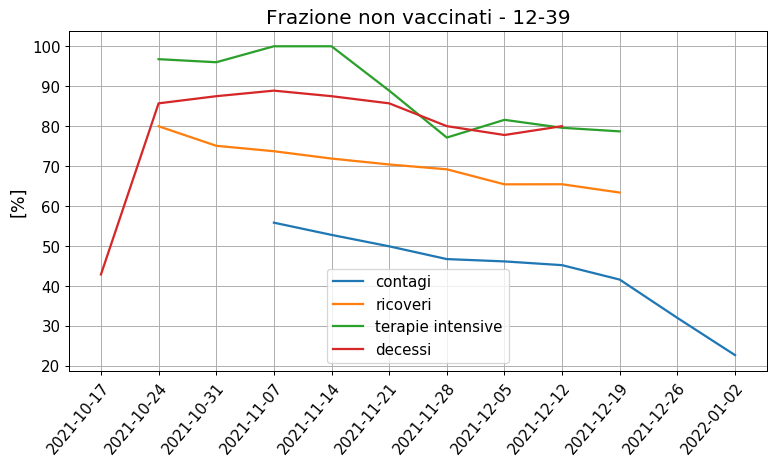

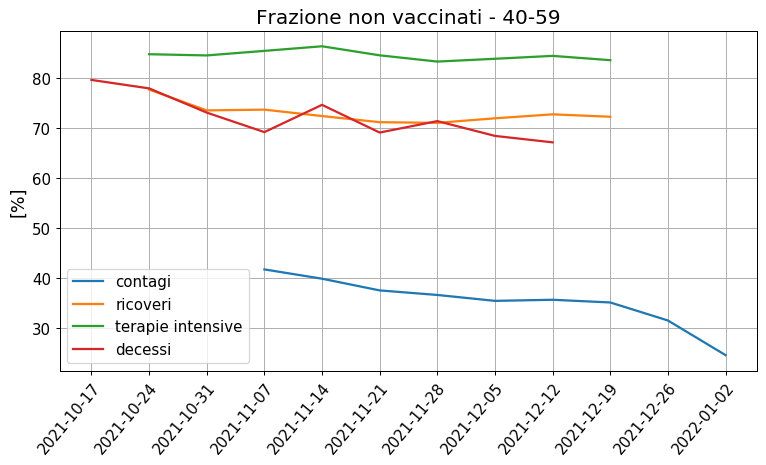

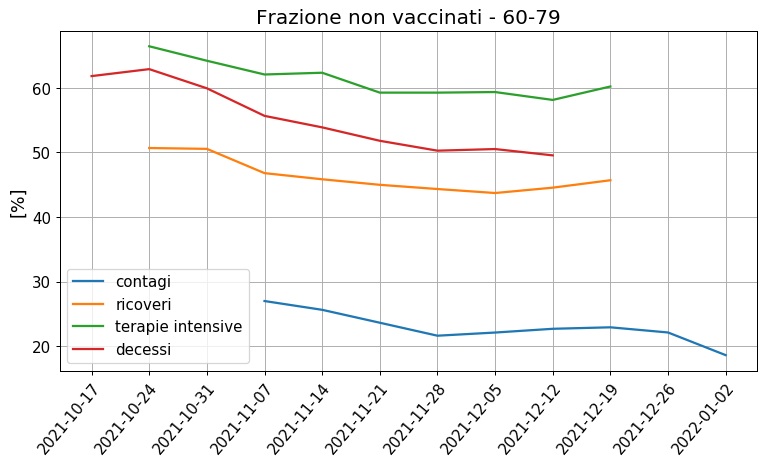

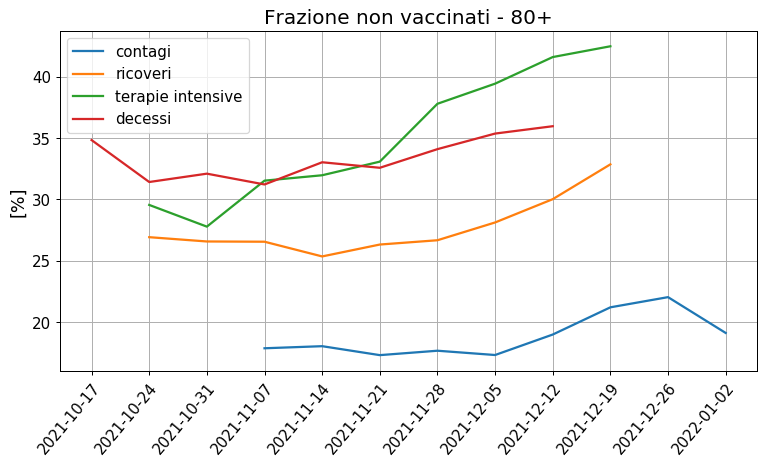

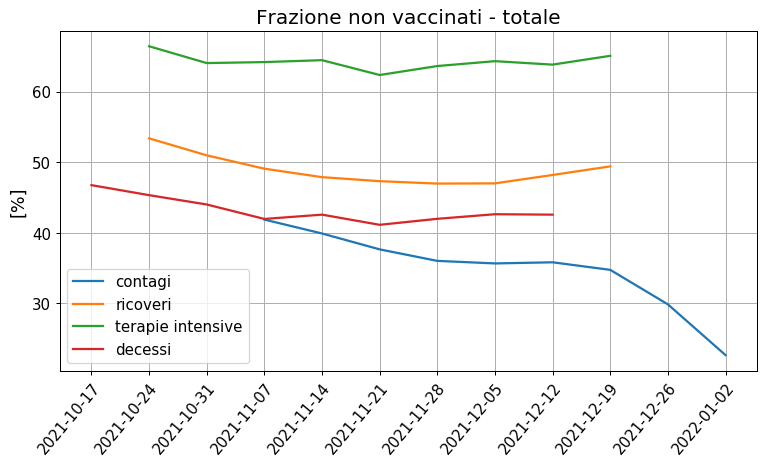

In [53]:
for age in sorted(age_values):
    plt.figure(dpi=90, figsize=(10,5))
    dates_str = []
    dates = []
    for split in ["contagi", "ricoveri", "terapie_intensive", "decessi"]:
        df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)]
        dates_str += [x.strftime("%Y-%m-%d") for x in df_plt.data.unique()]
        dates += [x for x in df_plt.data.unique()]
        plt.plot(df_plt.data,
                 100*df_plt.no_vax_frac,
                 label=split.replace("_"," "),
                 linewidth=1.8
                )
    title = f"Frazione non vaccinati - {age}"
    plt.title(title, fontsize=16)
    plt.grid()
    plt.legend(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("[%]",fontsize=14)
    
    dates_str = sorted(list(set(dates_str)), reverse=False)
    dates = sorted(list(set(dates)), reverse=False)
    plt.xticks(dates,
               dates_str,
               fontsize=12,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right")
    plt.savefig(f"{plots_folder}/frazione_no_vax_{age}",bbox_inches="tight")

In [54]:
def plot_var_ages(split, varname="vax"):
    plt.figure(dpi=90, figsize=(10,5))
    for age in sorted(age_values):
        df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split=="terapie_intensive")]
        plt.plot(df_plt.data,
            df_plt[varname],
            label=age,
            linewidth=1.8)
    title = f"Totale {varname} {split}".replace("_", " ")
    plt.title(title, fontsize=16)
    plt.grid()
    plt.legend(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(df_plt.data,
               fontsize=12,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right"
              )

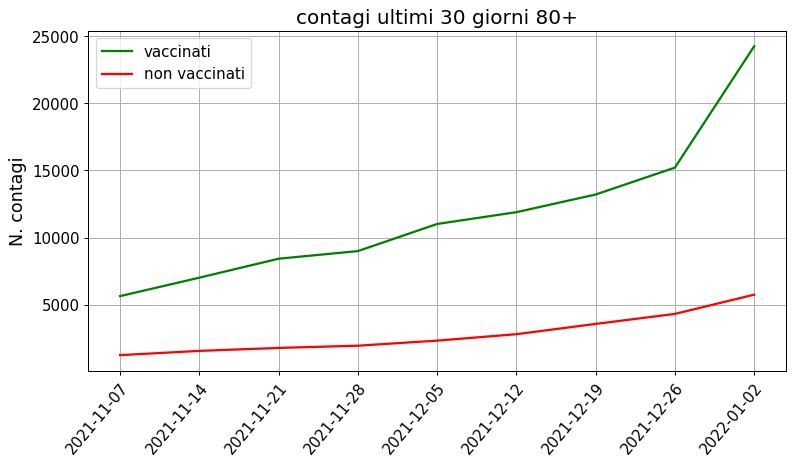

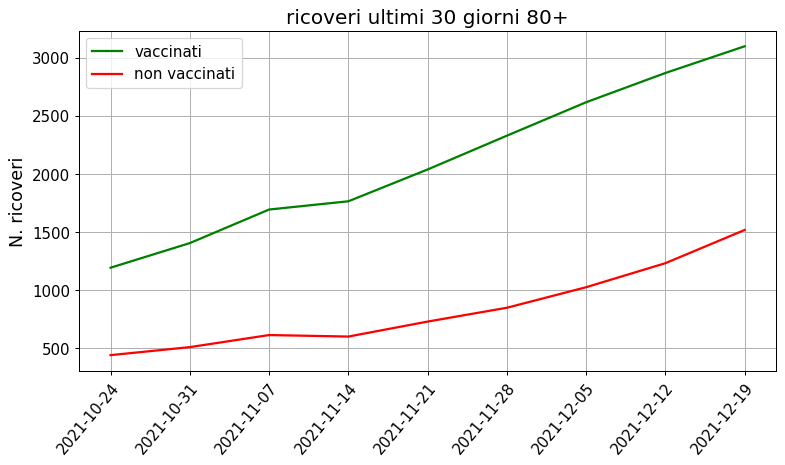

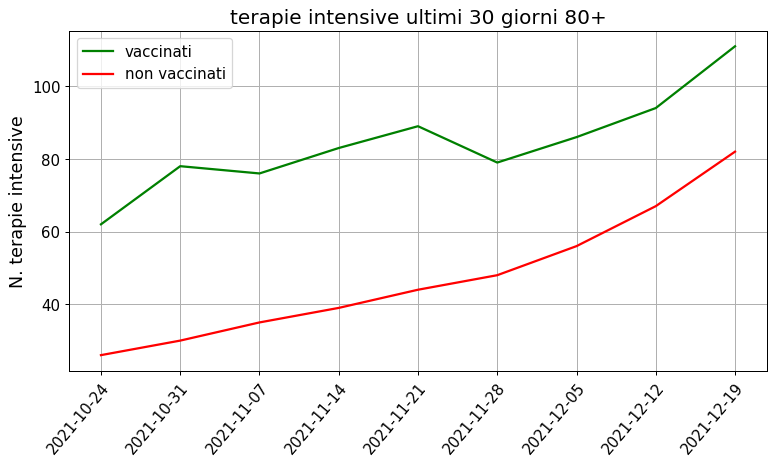

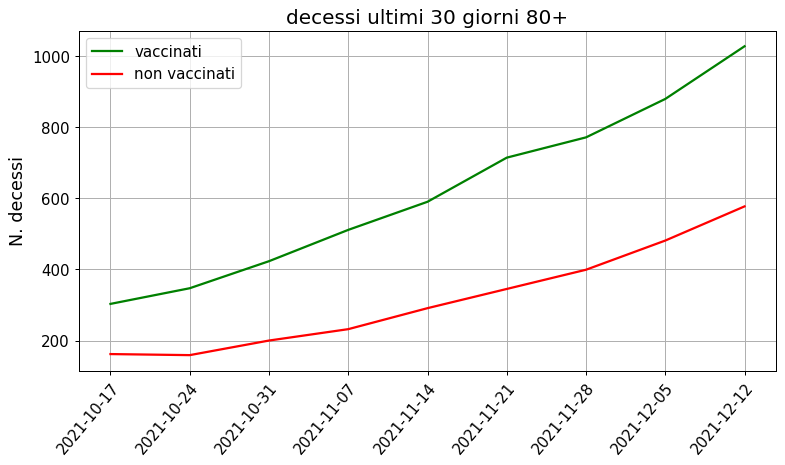

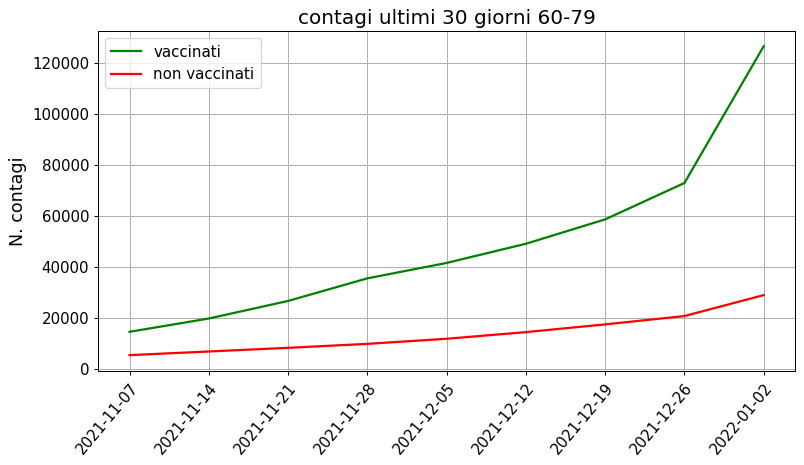

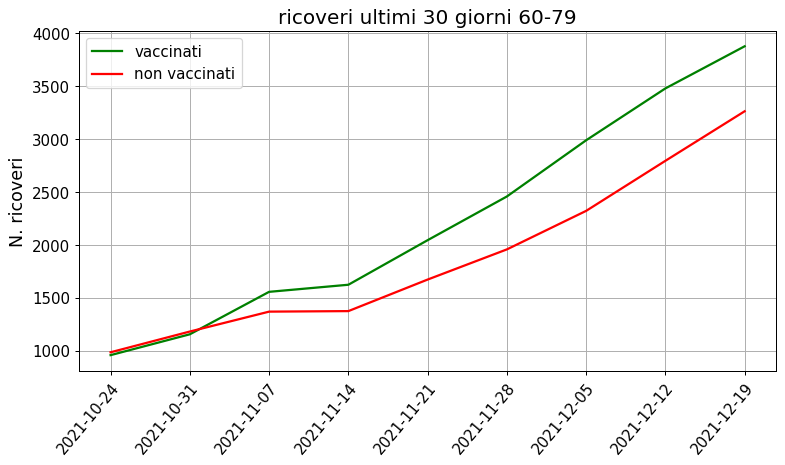

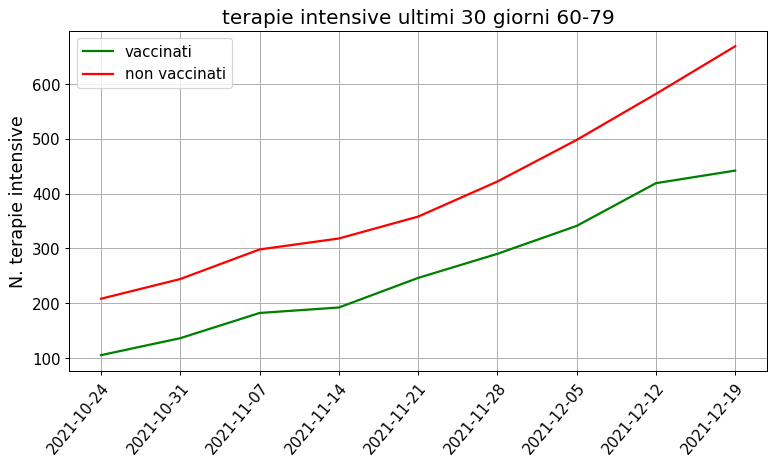

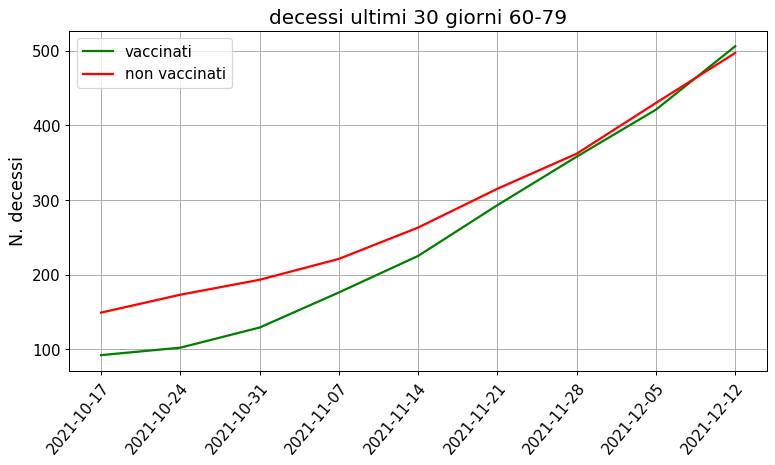

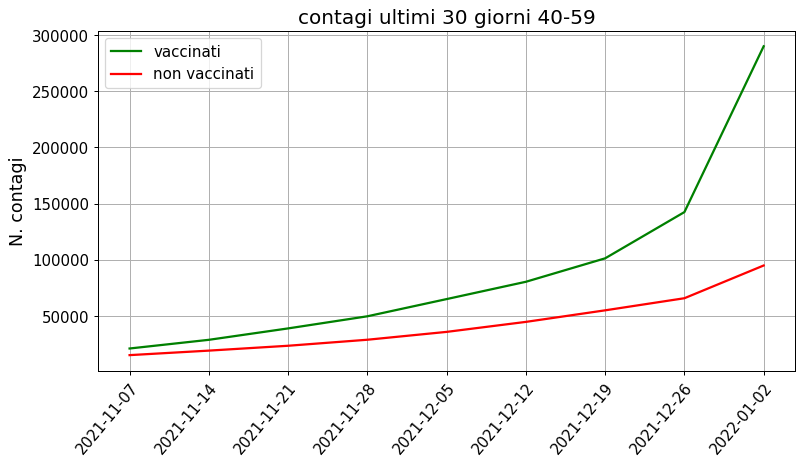

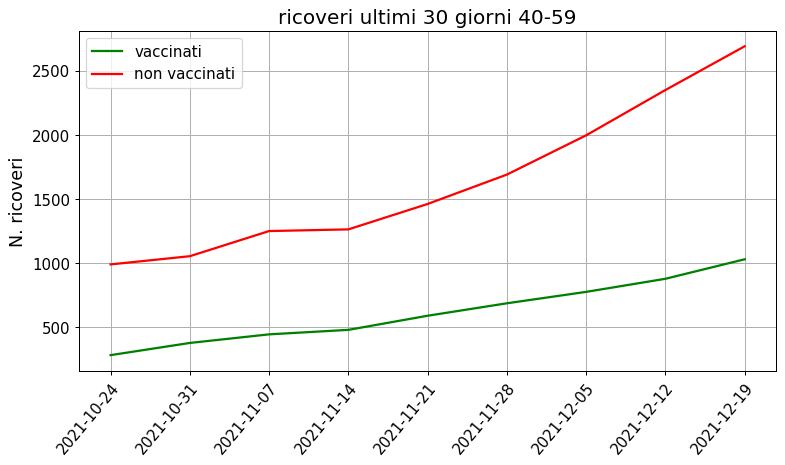

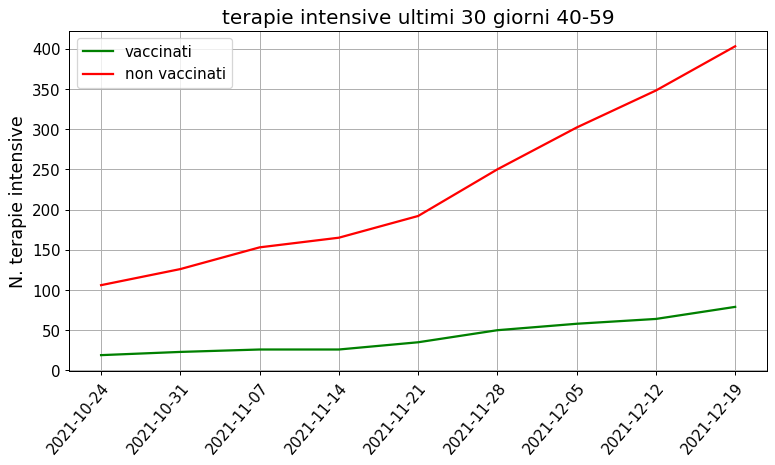

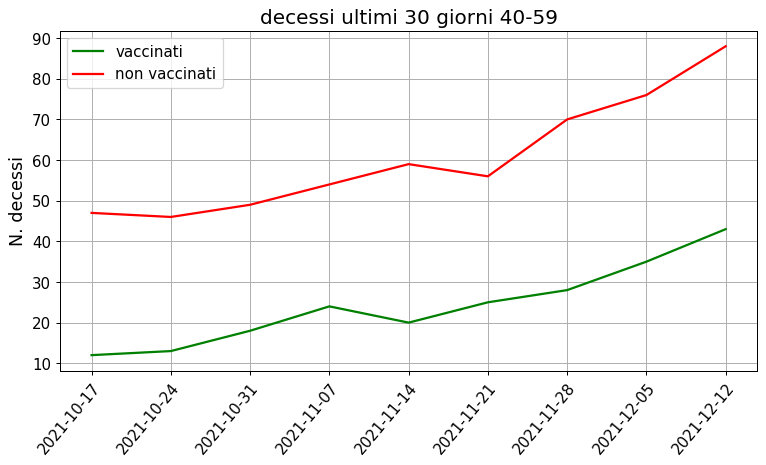

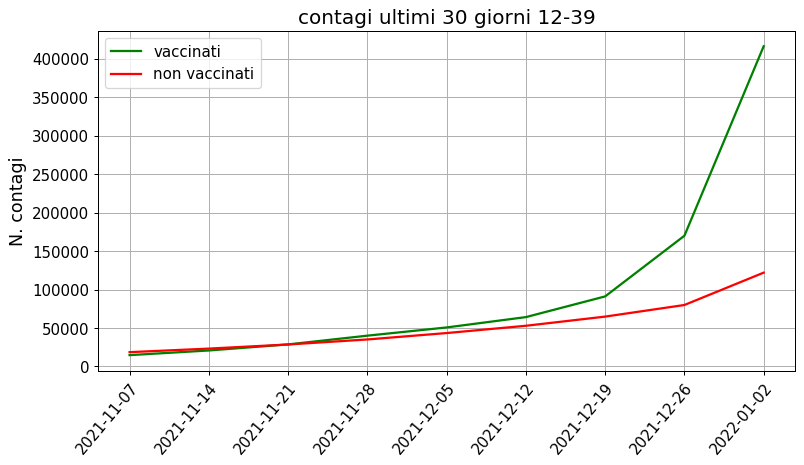

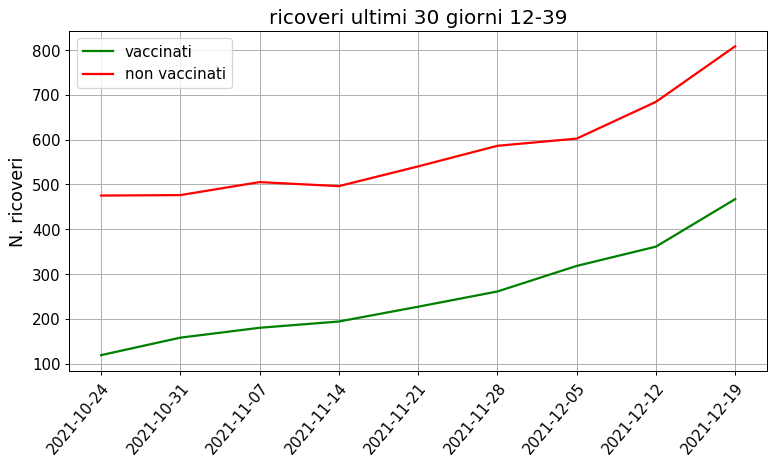

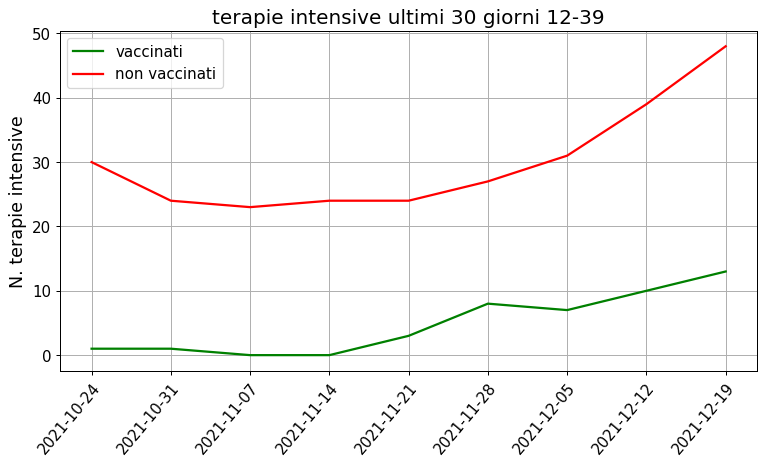

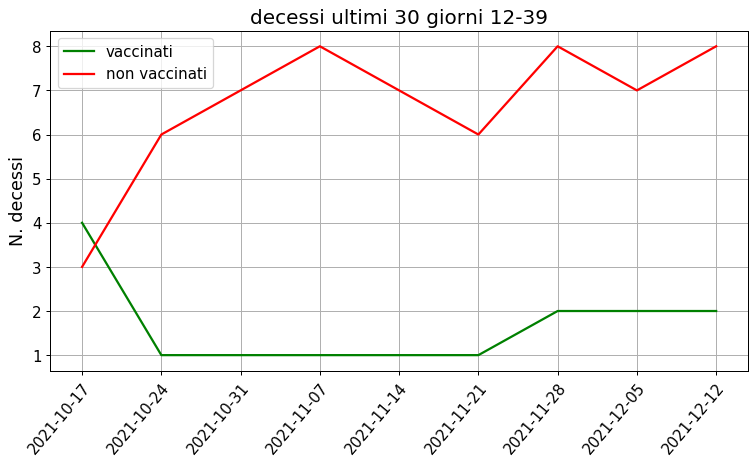

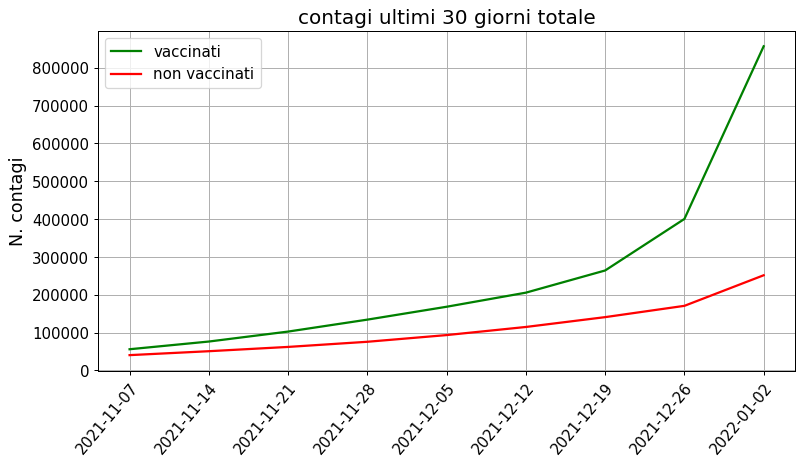

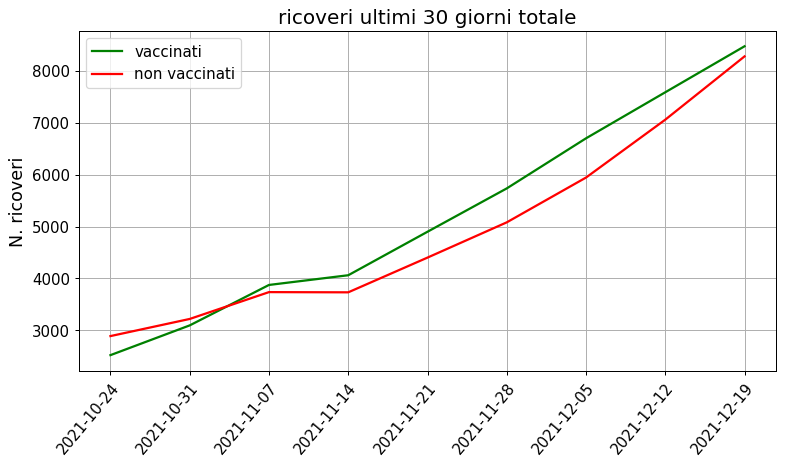

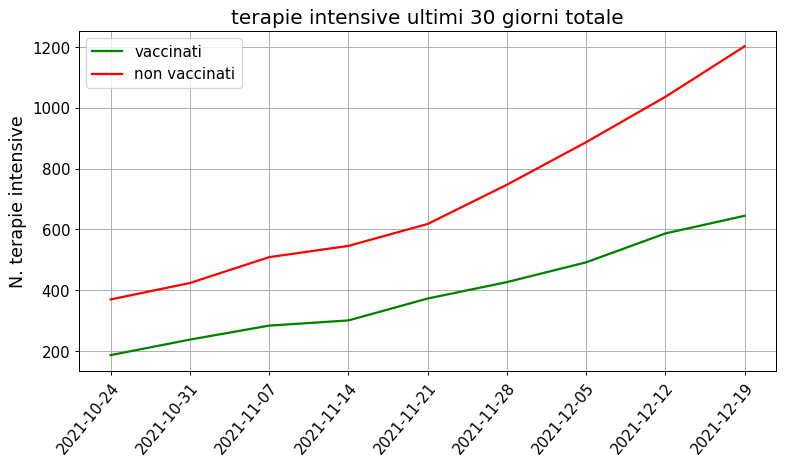

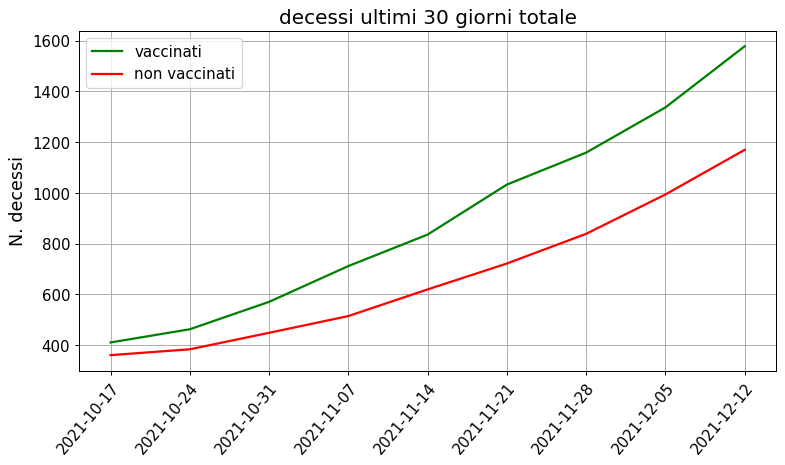

In [55]:
for age in age_values:
    for split in splits:
        df_plt = df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)]
        savename = f"{split}_{age}"
        yvars = ["vax", "no_vax"]
        savename += "_" + "_".join(yvars)
        createXYPlot(df_plt,
                     y=yvars,
                     x="data",
                     labels=["vaccinati", "non vaccinati"],
                     colors=["g","r"],
                     plots_folder=plots_folder,
                     linewidth=1.8,
                     days_interval=1,
                     title=f"{split} ultimi 30 giorni {age}".replace("_"," "),
                     savename=savename,
                     ytitle=f"N. {split}".replace("_"," "),
                     figsize_x=10,
                     figsize_y=5,
                     dpis=90
                    )

In [56]:
def get_lethality(df: pd.DataFrame, 
                  savename: str,
                  yscale: str ="linear"
                 ):

    value_cols = ["vax",
                  "no_vax",
                  "1_dose",
                  "2_dosi_lt_cut",
                  "2_dosi_gt_cut",
                  "booster",
                 ]
    df_pivot = df.pivot(index='data',columns=["split"],values=value_cols)
    cols = []
    for i in range(0,len(df_pivot.columns)):
        cols.append(df_pivot.columns.get_level_values(1)[i] + '_' + df_pivot.columns.get_level_values(0)[i])
    df_pivot.columns = cols

    for v in value_cols:
        df_pivot[f"letalita_{v}"] = df_pivot[f"decessi_{v}"]/df_pivot[f"diagnosi_{v}"]
        df_pivot[f"sd_letalita_{v}"] = np.sqrt(df_pivot[f"letalita_{v}"] * (1 - df_pivot[f"letalita_{v}"]) / df_pivot[f"diagnosi_{v}"])
        df_pivot[f"lo_err_letalita_{v}"] = df_pivot[f"letalita_{v}"] - 1.645 * df_pivot[f"sd_letalita_{v}"]
        df_pivot[f"hi_err_letalita_{v}"] = df_pivot[f"letalita_{v}"] + 1.645 * df_pivot[f"sd_letalita_{v}"]
        df_pivot[f"lo_err_letalita_{v}"] = df_pivot[f"lo_err_letalita_{v}"].apply(lambda x: 0 if x < 0 else x)
    
    dates = df_pivot.dropna().index
    plt.figure(figsize=(10,5),dpi=90)
    for y in ["no_vax", "1_dose", "2_dosi_lt_cut", "2_dosi_gt_cut", "booster"]:
        plt.plot(df_pivot.index, 
                 100*df_pivot[f"letalita_{y}"],
                 label=y,
                 linewidth=1.8
                )
        plt.fill_between(df_pivot.index, 
                     100*df_pivot[f"lo_err_letalita_{y}"], 
                     100*df_pivot[f"hi_err_letalita_{y}"],
                     alpha=0.1
                    )
    plt.grid()
    plt.legend(fontsize=12)
    plt.title(f"Letalità Covid19 per stato vaccinale -- {age} -- dati ISS",fontsize=19)
    plt.ylabel("Decessi / Contagi [%]",fontsize=14)
    _ = plt.yticks(fontsize=13)
    _ = plt.xticks(dates,
                   fontsize=13,
                   rotation=50, 
                   rotation_mode="anchor", 
                   verticalalignment = "top",
                   horizontalalignment = "right"
                  )
    plt.yscale(yscale)
    plt.savefig(f"./plots/{savename}.png", bbox_inches="tight")

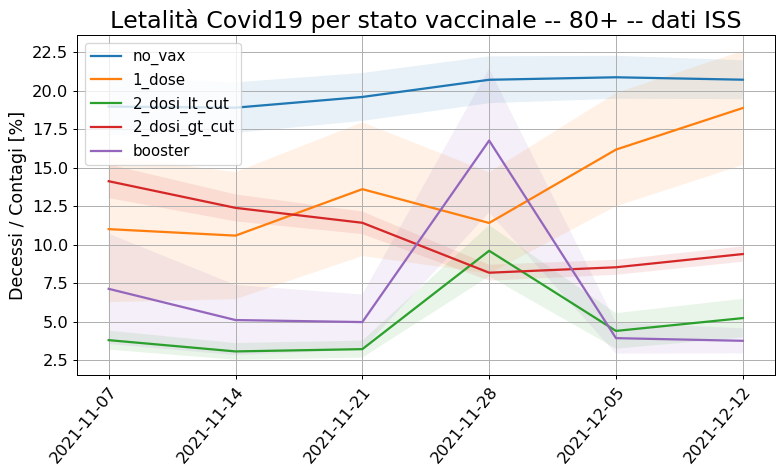

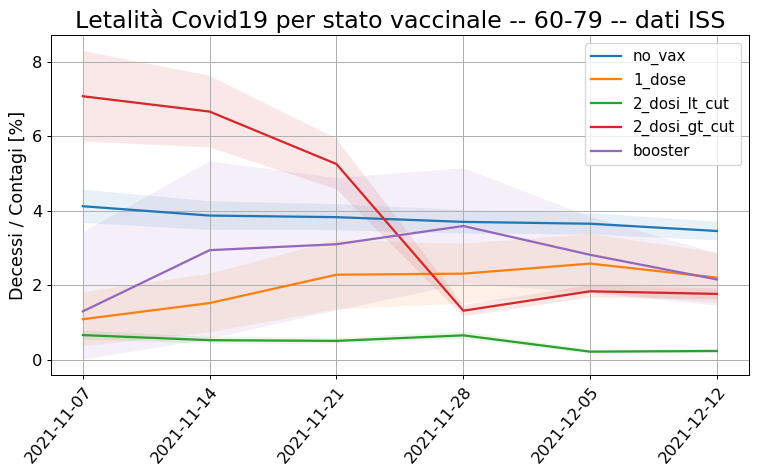

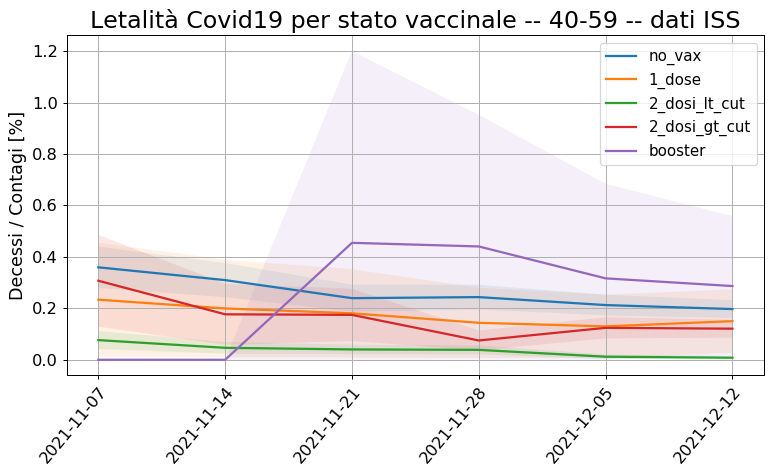

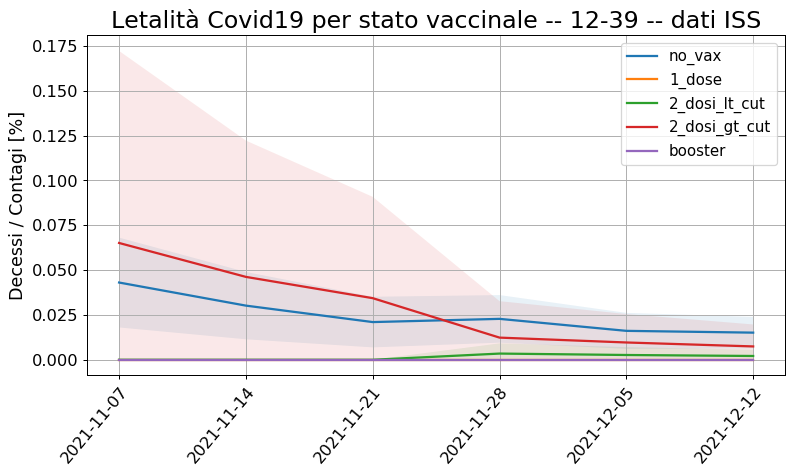

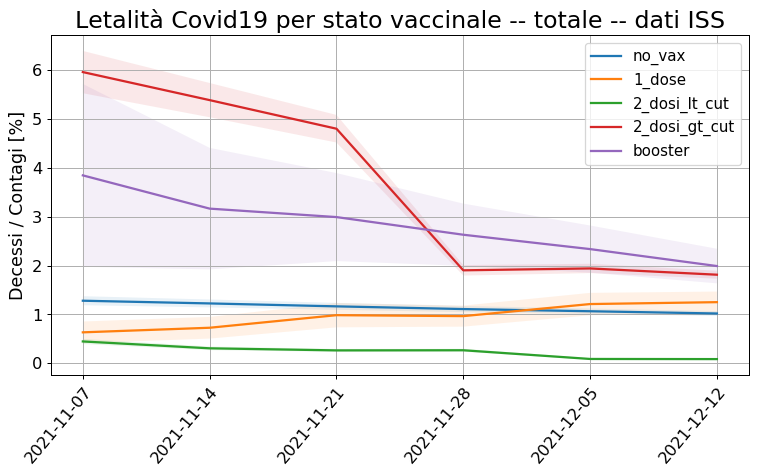

In [207]:
for age in age_values:
    df_let = df_iss[df_iss.fascia_eta==age]
    get_lethality(df_let,
                  f"letalita_iss_{age}",
                  yscale="linear"
                 )